# Atividade Otimizando Estratégias de E-Commerce com Análise de Dados

## Aluno

### Michel Cirilo de Oliveira

# Problema de Negócio 
Como o e-commerce pode identificar padrões de compra, segmentar clientes de forma eficiente e 
reduzir cancelamentos para aumentar a lucratividade? 
Objetivos 
### 1. Compreensão do Negócio e do Problema 
o Entender a dinâmica do e-commerce, os principais desafios e o que os dados podem 
revelar sobre os clientes. 
o Definir métricas de sucesso, como taxa de cancelamento, ticket médio e recorrência 
de compras. 
### 2. Compreensão dos Dados 
o Explorar a estrutura do dataset fornecido. 
o Verificar a qualidade dos dados: tratar valores ausentes, duplicados e inconsistentes. 
o Criar novas variáveis que possam ajudar na análise. 
### 3. Análise Exploratória de Dados (EDA) 
o Investigar padrões de compras ao longo do tempo. 
o Identificar os produtos mais vendidos e quais são frequentemente comprados juntos. 
o Avaliar o impacto dos preços e descontos nas vendas. 
o Analisar padrões de cancelamento de pedidos. 
### 4. Segmentação de Clientes 
o Criar grupos de clientes com base em comportamentos de compra. 
o Aplicar técnicas como RFM (Recência, Frequência e Valor Monetário) ou K-Means 
Clustering. 
o Analisar as características de cada segmento e sugerir estratégias de marketing 
personalizadas. 
### 5. Geração de Insights e Recomendações 
o Identificar padrões que podem ajudar na redução de cancelamentos. 
o Sugerir estratégias de fidelização para clientes de alto valor. 
o Apontar oportunidades de cross-sell e up-sell. 
o Fornecer insights para otimizar promoções e campanhas de marketing.

In [4]:
import pandas as pd

In [6]:
df = pd.read_csv('dataset_ecommerce.csv', encoding='windows-1252')

### Passo 1: Compreensão do Dataset


Explorar as variáveis disponíveis no arquivo CSV

Entender quais colunas são relevantes para a análise

Identificar possíveis problemas de qualidade dos dados

In [10]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [12]:
# Listando as colunas
print(df.columns)

Index(['InvoiceNo', 'StockCode', 'Description', 'Quantity', 'InvoiceDate',
       'UnitPrice', 'CustomerID', 'Country'],
      dtype='object')


In [14]:
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


CustomerID  com  135080 registros nulos mostra uma possivel necessidade de eliminação de registros, 
uma vez que registros sem clientes não seria possivel fazer a segmentação conforme problema de negócio. s. 

In [17]:
# Criando um novo DataFrame 'dfCustomer' com CustomerID não nulo
dfCustomer = df[df['CustomerID'].notna()].copy()

In [19]:
print(dfCustomer.isnull().sum())

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64


Após criação de um df com remoção dos registro sem cliente todos campos estão preenchidos.

### Identificando os faturamentos cancelados

In [23]:
def classificar_invoice(invoice_no):
    """Classifica o InvoiceNo com base no primeiro caractere."""
    if isinstance(invoice_no, str) and invoice_no:  # Verifica se é string e não está vazio
        if invoice_no.startswith('A'):
            return 'Ajustar'
        elif invoice_no.startswith('C'):
            return 'Cancelada'
        else:
            return 'Registrada'
    else:
        return 'Registrada' # Caso o primeiro caracter não seja string ou esteja vazio, retorna 'Registrada'


# Aplica a função para criar a nova coluna 'StatusInvoice'
dfCustomer['StatusInvoice'] = dfCustomer['InvoiceNo'].apply(classificar_invoice)

# Exibe o DataFrame com a nova coluna
print(dfCustomer[['InvoiceNo', 'StatusInvoice']]) #exibe apenas as colunas relevantes para verificar o resultado.

       InvoiceNo StatusInvoice
0         536365    Registrada
1         536365    Registrada
2         536365    Registrada
3         536365    Registrada
4         536365    Registrada
...          ...           ...
541904    581587    Registrada
541905    581587    Registrada
541906    581587    Registrada
541907    581587    Registrada
541908    581587    Registrada

[406829 rows x 2 columns]


In [25]:
dfCustomer.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,StatusInvoice
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Registrada
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Registrada
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Registrada
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Registrada
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Registrada


In [27]:
contagem_status = dfCustomer['StatusInvoice'].value_counts()

print(contagem_status)

StatusInvoice
Registrada    397924
Cancelada       8905
Name: count, dtype: int64


In [29]:
# Distribuição da variável (StatusInvoice)
print("Distribuição da Variável StatusInvoice")
print(dfCustomer['StatusInvoice'].value_counts(), "\n")             #contagem absoluta
print(dfCustomer['StatusInvoice'].value_counts(normalize=True))     #proporção

Distribuição da Variável StatusInvoice
StatusInvoice
Registrada    397924
Cancelada       8905
Name: count, dtype: int64 

StatusInvoice
Registrada    0.978111
Cancelada     0.021889
Name: proportion, dtype: float64


___________________________________________________________________________________________________________________________

### Passo 2: Limpeza e Preparação dos Dados 

• Tratar valores ausentes e duplicados. 

• Criar novas colunas úteis (ex: total gasto por cliente, frequência de compra). 

• Corrigir formatos e inconsistências nos dados. 

##### Criando uma outra chave apenas com numeros para o faturamento

In [34]:
import re

def extrair_numeros(invoice_no):
    """Extrai os números de uma string InvoiceNo."""
    if isinstance(invoice_no, str):
        numeros = re.findall(r'\d+', invoice_no) # Encontra todas as sequências de dígitos
        if numeros:
            return ''.join(numeros) # Junta os números encontrados em uma única string
        else:
            return None # Retorna None se nenhum número for encontrado
    else:
        return None # Retorna None se o valor não for uma string

# Aplica a função para criar a nova coluna 'InvoiceNumber'
dfCustomer['InvoiceNumber'] = dfCustomer['InvoiceNo'].apply(extrair_numeros)

# Exibe o DataFrame com a nova coluna
print(dfCustomer[['InvoiceNo', 'InvoiceNumber']].head()) # Exibe as primeiras linhas para verificação

  InvoiceNo InvoiceNumber
0    536365        536365
1    536365        536365
2    536365        536365
3    536365        536365
4    536365        536365


In [36]:
print(dfCustomer[dfCustomer['StatusInvoice'] == 'Cancelada'].head())

    InvoiceNo StockCode                       Description  Quantity  \
141   C536379         D                          Discount        -1   
154   C536383    35004C   SET OF 3 COLOURED  FLYING DUCKS        -1   
235   C536391     22556    PLASTERS IN TIN CIRCUS PARADE        -12   
236   C536391     21984  PACK OF 12 PINK PAISLEY TISSUES        -24   
237   C536391     21983  PACK OF 12 BLUE PAISLEY TISSUES        -24   

         InvoiceDate  UnitPrice  CustomerID         Country StatusInvoice  \
141   12/1/2010 9:41      27.50     14527.0  United Kingdom     Cancelada   
154   12/1/2010 9:49       4.65     15311.0  United Kingdom     Cancelada   
235  12/1/2010 10:24       1.65     17548.0  United Kingdom     Cancelada   
236  12/1/2010 10:24       0.29     17548.0  United Kingdom     Cancelada   
237  12/1/2010 10:24       0.29     17548.0  United Kingdom     Cancelada   

    InvoiceNumber  
141        536379  
154        536383  
235        536391  
236        536391  
237       

In [38]:
dfCustomer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 10 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   InvoiceNo      406829 non-null  object 
 1   StockCode      406829 non-null  object 
 2   Description    406829 non-null  object 
 3   Quantity       406829 non-null  int64  
 4   InvoiceDate    406829 non-null  object 
 5   UnitPrice      406829 non-null  float64
 6   CustomerID     406829 non-null  float64
 7   Country        406829 non-null  object 
 8   StatusInvoice  406829 non-null  object 
 9   InvoiceNumber  406829 non-null  object 
dtypes: float64(2), int64(1), object(7)
memory usage: 34.1+ MB


##### Adicionando Coluna com valor de Venda

In [41]:
# a coluna 'ValorVenda' foi adicionada ao DataFrame dfCustomer
dfCustomer['InvoiceValue'] = dfCustomer['Quantity'] * dfCustomer['UnitPrice']

In [43]:
dfCustomer.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,StatusInvoice,InvoiceNumber,InvoiceValue
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,Registrada,536365,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Registrada,536365,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,Registrada,536365,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Registrada,536365,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,Registrada,536365,20.34


In [45]:
dfCustomer.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 11 columns):
 #   Column         Non-Null Count   Dtype  
---  ------         --------------   -----  
 0   InvoiceNo      406829 non-null  object 
 1   StockCode      406829 non-null  object 
 2   Description    406829 non-null  object 
 3   Quantity       406829 non-null  int64  
 4   InvoiceDate    406829 non-null  object 
 5   UnitPrice      406829 non-null  float64
 6   CustomerID     406829 non-null  float64
 7   Country        406829 non-null  object 
 8   StatusInvoice  406829 non-null  object 
 9   InvoiceNumber  406829 non-null  object 
 10  InvoiceValue   406829 non-null  float64
dtypes: float64(3), int64(1), object(7)
memory usage: 37.2+ MB


_____________________________________________________________________________________________________________________

### Passo 3: Análise Exploratória de Dados (EDA)

##### Criar visualizações para entender os padrões de compra.

In [50]:
# Obtém os valores únicos de StatusInvoice
status_invoices = dfCustomer['StatusInvoice'].unique()

# Itera sobre cada StatusInvoice e exibe as estatísticas
for status in status_invoices:
    print(f"Estatísticas para StatusInvoice: {status}")
    print(dfCustomer[dfCustomer['StatusInvoice'] == status]['InvoiceValue'].describe())
    print("\n" + "-" * 40 + "\n") # Linha separadora para melhor visualização


Estatísticas para StatusInvoice: Registrada
count    397924.000000
mean         22.394749
std         309.055588
min           0.000000
25%           4.680000
50%          11.800000
75%          19.800000
max      168469.600000
Name: InvoiceValue, dtype: float64

----------------------------------------

Estatísticas para StatusInvoice: Cancelada
count      8905.000000
mean        -68.651554
std        2019.177682
min     -168469.600000
25%         -17.000000
50%          -8.500000
75%          -3.300000
max          -0.120000
Name: InvoiceValue, dtype: float64

----------------------------------------



In [52]:
#Verificar a frequencia de alguns campos categóricos --> dfCustomer Country
print("Distribuição por Country")
print(dfCustomer['Country'].value_counts(dropna=False))

Distribuição por Country
Country
United Kingdom          361878
Germany                   9495
France                    8491
EIRE                      7485
Spain                     2533
Netherlands               2371
Belgium                   2069
Switzerland               1877
Portugal                  1480
Australia                 1259
Norway                    1086
Italy                      803
Channel Islands            758
Finland                    695
Cyprus                     622
Sweden                     462
Austria                    401
Denmark                    389
Japan                      358
Poland                     341
USA                        291
Israel                     250
Unspecified                244
Singapore                  229
Iceland                    182
Canada                     151
Greece                     146
Malta                      127
United Arab Emirates        68
European Community          61
RSA                         58
Lebano

In [54]:
#Verificar a frequencia de alguns campos categóricos --> dfCustomer Description
print("Distribuição por Description")
print(dfCustomer['Description'].value_counts(dropna=False))

Distribuição por Description
Description
WHITE HANGING HEART T-LIGHT HOLDER    2070
REGENCY CAKESTAND 3 TIER              1905
JUMBO BAG RED RETROSPOT               1662
ASSORTED COLOUR BIRD ORNAMENT         1418
PARTY BUNTING                         1416
                                      ... 
ANTIQUE RASPBERRY FLOWER EARRINGS        1
WALL ART,ONLY ONE PERSON                 1
GOLD/AMBER DROP EARRINGS W LEAF          1
INCENSE BAZAAR PEACH                     1
PINK BAROQUE FLOCK CANDLE HOLDER         1
Name: count, Length: 3896, dtype: int64


In [56]:
# Importação da dupla dinâmica para visualização dos dados
import seaborn as sns
import matplotlib.pyplot as plt

In [58]:
### 2.1 Distribuição da Variável (StatusInvoice)

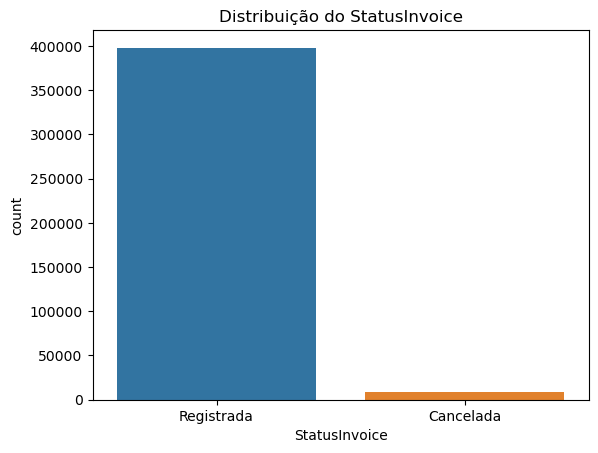

In [60]:
# Gráfico de contagem para a variável alvo
sns.countplot(x='StatusInvoice', data=dfCustomer)
plt.title('Distribuição do StatusInvoice')
plt.show()

Eixo X (StatusInvoice):
Este eixo representa as diferentes categorias da variável "StatusInvoice".
As duas categorias presentes são:
"Registrada"
"Cancelada"

Eixo Y (count):
Este eixo representa a contagem de ocorrências para cada categoria de "StatusInvoice".
Os valores variam de 0 a 400.000.
Barras:

Registrada:
A barra para "Registrada" é extremamente alta, quase atingindo 400.000.
Isso indica que a grande maioria dos registros tem o status "Registrada".

Cancelada:
A barra para "Cancelada" é muito baixa, quase imperceptível em comparação com "Registrada".
Isso indica que apenas uma pequena fração dos registros tem o status "Cancelada".

Obs em contagem de registros

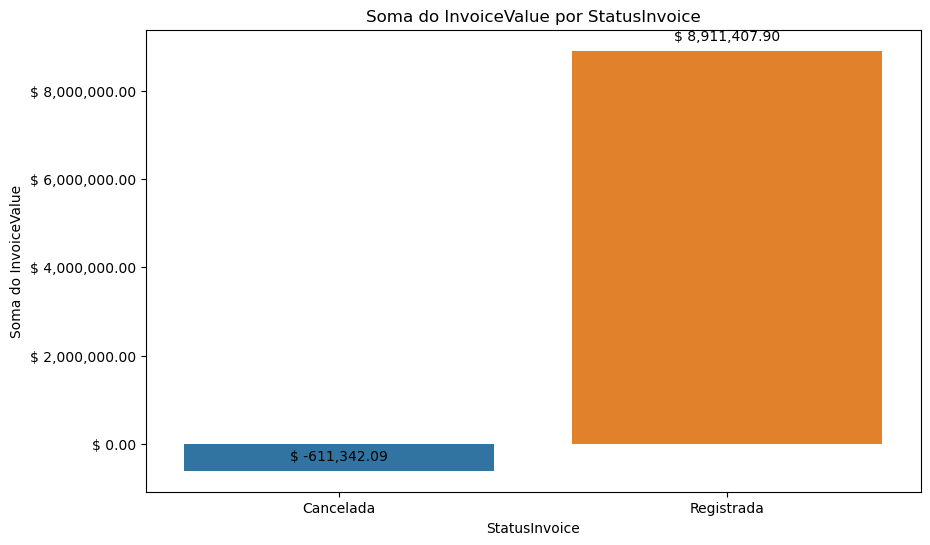

In [63]:
import matplotlib.ticker as mticker
# Agrupa por StatusInvoice e soma os valores de InvoiceValue
invoice_value_por_status = dfCustomer.groupby('StatusInvoice')['InvoiceValue'].sum().reset_index()

# Cria o gráfico de barras
plt.figure(figsize=(10, 6)) # Ajusta o tamanho da figura
ax = sns.barplot(x='StatusInvoice', y='InvoiceValue', data=invoice_value_por_status)

# Adiciona rótulos de valores às barras
for p in ax.patches:
    ax.annotate(f'$ {p.get_height():,.2f}', # Formata como moeda brasileira
                (p.get_x() + p.get_width() / 2., p.get_height()),
                ha='center', va='center',
                xytext=(0, 10),
                textcoords='offset points')

# Formata o eixo y como moeda brasileira
ax.yaxis.set_major_formatter(mticker.StrMethodFormatter('$ {x:,.2f}'))

# Adiciona título e rótulos aos eixos
plt.title('Soma do InvoiceValue por StatusInvoice')
plt.xlabel('StatusInvoice')
plt.ylabel('Soma do InvoiceValue')

# Exibe o gráfico
plt.show()

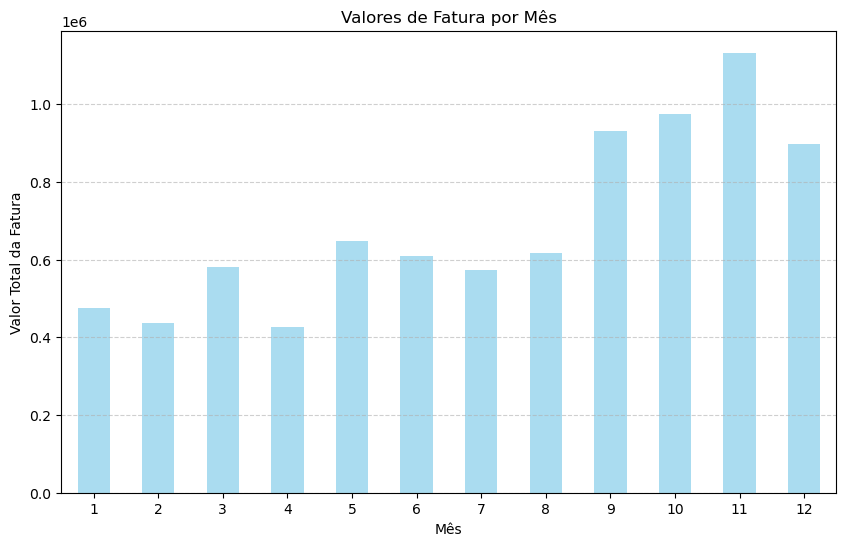

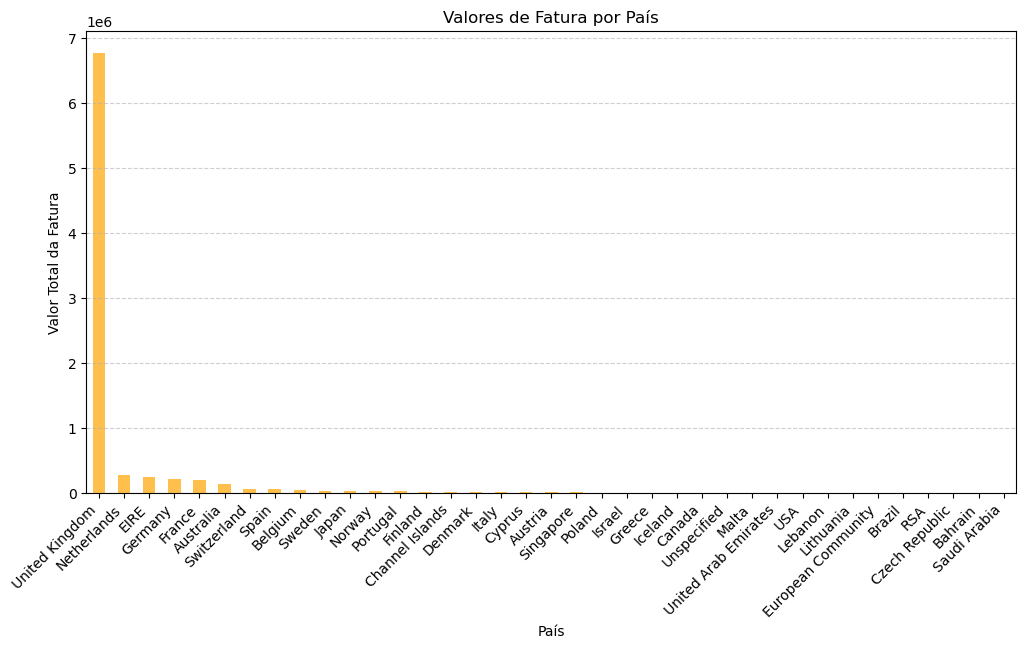

In [65]:
# Certifique-se de que a coluna InvoiceDate está em formato datetime
dfCustomer['InvoiceDate'] = pd.to_datetime(dfCustomer['InvoiceDate'])

# Criar uma nova coluna com os meses
dfCustomer['Month'] = dfCustomer['InvoiceDate'].dt.month

# Gráfico por Mês
monthly_data = dfCustomer.groupby('Month')['InvoiceValue'].sum()

plt.figure(figsize=(10, 6))
monthly_data.plot(kind='bar', color='skyblue', alpha=0.7)
plt.title('Valores de Fatura por Mês')
plt.xlabel('Mês')
plt.ylabel('Valor Total da Fatura')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

# Gráfico por País
country_data = dfCustomer.groupby('Country')['InvoiceValue'].sum()

plt.figure(figsize=(12, 6))
country_data.sort_values(ascending=False).plot(kind='bar', color='orange', alpha=0.7)
plt.title('Valores de Fatura por País')
plt.xlabel('País')
plt.ylabel('Valor Total da Fatura')
plt.xticks(rotation=45, ha='right')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


C:\Users\miche\AppData\Local\Temp\ipykernel_1500\3467914104.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_uk['Month'] = df_uk['InvoiceDate'].dt.month


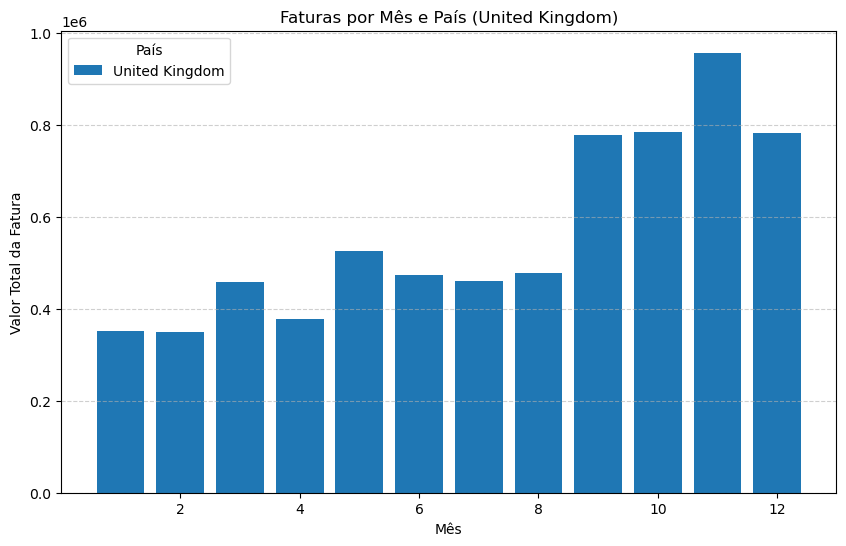

In [67]:
# Certifique-se de que a coluna InvoiceDate está em formato datetime
dfCustomer['InvoiceDate'] = pd.to_datetime(dfCustomer['InvoiceDate'])

# Filtrar apenas o país 'United Kingdom'
df_uk = dfCustomer[dfCustomer['Country'] == 'United Kingdom']

# Criar uma nova coluna com os meses
df_uk['Month'] = df_uk['InvoiceDate'].dt.month

# Agrupar os dados por mês e país
grouped_data = df_uk.groupby(['Month', 'Country'])['InvoiceValue'].sum()

# Criar o gráfico de barras agrupadas
plt.figure(figsize=(10, 6))

months = grouped_data.index.get_level_values('Month').unique()
for country in grouped_data.index.get_level_values('Country').unique():
    values = grouped_data.loc[:, country]
    plt.bar(months, values, label=country)

plt.title('Faturas por Mês e País (United Kingdom)')
plt.xlabel('Mês')
plt.ylabel('Valor Total da Fatura')
plt.legend(title='País')
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


##### Analisar quais produtos são frequentemente comprados juntos

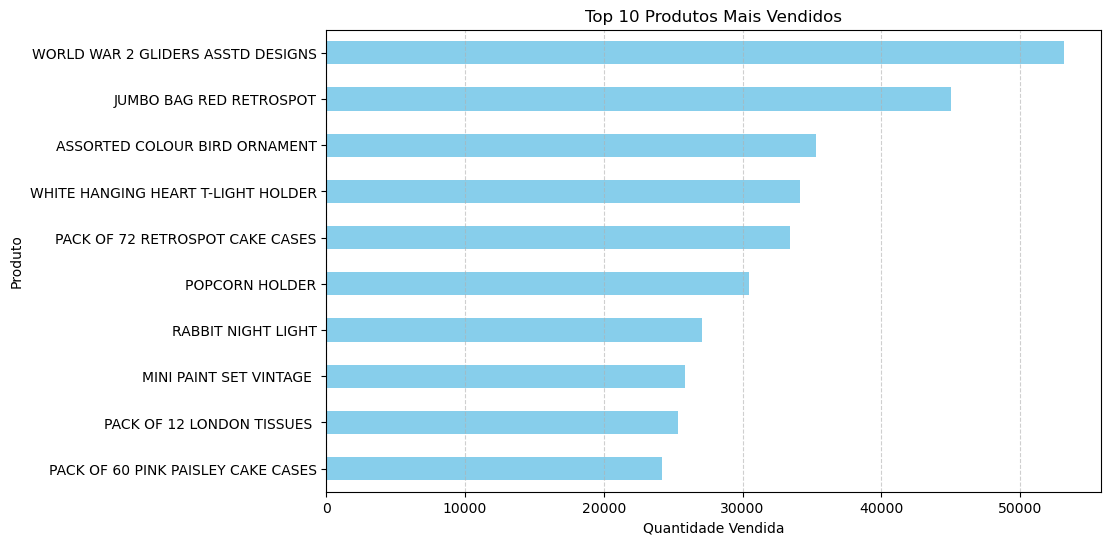

In [70]:
# Produtos mais frequentes
top_products = dfCustomer.groupby('Description')['Quantity'].sum().sort_values(ascending=False)

# Visualizando os 10 principais produtos
top_products.head(10).plot(kind='barh', color='skyblue', figsize=(10, 6))
plt.title('Top 10 Produtos Mais Vendidos')
plt.xlabel('Quantidade Vendida')
plt.ylabel('Produto')
plt.gca().invert_yaxis()  # Inverte a ordem dos produtos
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()




In [72]:

from itertools import combinations
from collections import Counter

# Agrupar produtos por fatura
invoice_products = dfCustomer.groupby('InvoiceNo')['Description'].apply(list)

# Identificar combinações frequentes
combinations_counter = Counter()
for products in invoice_products:
    if len(products) > 1:  # Combinações apenas para faturas com mais de um produto
        combinations_counter.update(combinations(products, 2))  # Combinações de pares

# Exibir as combinações mais frequentes
most_common_combinations = combinations_counter.most_common(10)
print("Top 10 combinações de produtos mais frequentes:")
for combo, freq in most_common_combinations:
    print(f"{combo}: {freq} vezes")


Top 10 combinações de produtos mais frequentes:
('GREEN REGENCY TEACUP AND SAUCER', 'PINK REGENCY TEACUP AND SAUCER'): 449 vezes
('LUNCH BAG RED RETROSPOT', 'LUNCH BAG PINK POLKADOT'): 330 vezes
('ROSES REGENCY TEACUP AND SAUCER ', 'GREEN REGENCY TEACUP AND SAUCER'): 323 vezes
('LUNCH BAG RED RETROSPOT', 'LUNCH BAG  BLACK SKULL.'): 319 vezes
('JUMBO BAG PINK POLKADOT', 'JUMBO BAG RED RETROSPOT'): 317 vezes
('GREEN REGENCY TEACUP AND SAUCER', 'ROSES REGENCY TEACUP AND SAUCER '): 311 vezes
('ALARM CLOCK BAKELIKE RED ', 'ALARM CLOCK BAKELIKE GREEN'): 310 vezes
('ALARM CLOCK BAKELIKE GREEN', 'ALARM CLOCK BAKELIKE RED '): 290 vezes
('PINK REGENCY TEACUP AND SAUCER', 'GREEN REGENCY TEACUP AND SAUCER'): 283 vezes
("PAPER CHAIN KIT 50'S CHRISTMAS ", 'PAPER CHAIN KIT VINTAGE CHRISTMAS'): 276 vezes


##### Descobrir fatores que contribuem para cancelamentos.

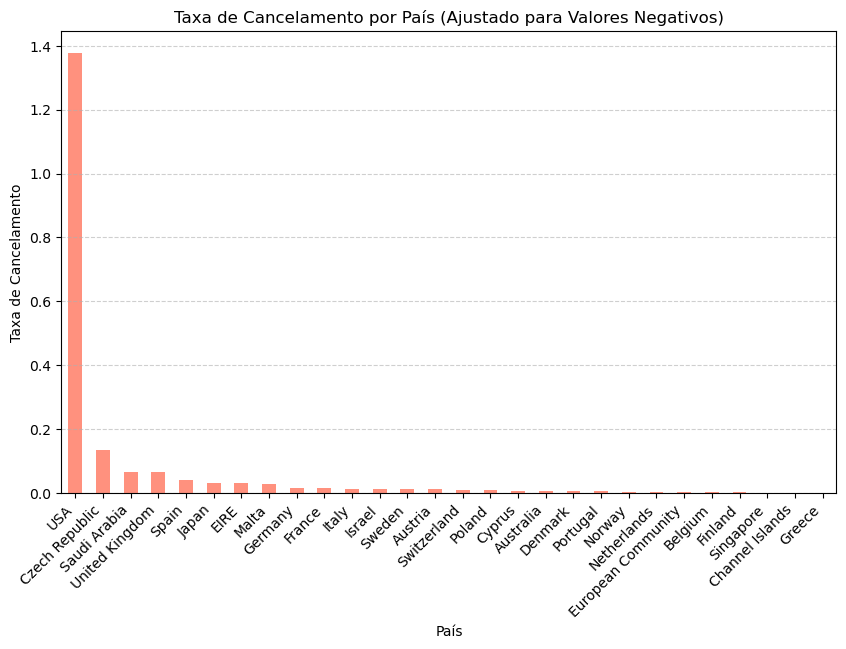

In [75]:


# Filtrar registros com status 'Cancelled'
cancelled_data = dfCustomer[dfCustomer['StatusInvoice'] == 'Cancelada']

# Verificar se há registros de cancelamento
if cancelled_data.empty:
    print("Não há dados de cancelamento disponíveis para análise.")
else:
    # Contagem de cancelamentos por país (valores absolutos)
    cancel_count = cancelled_data.groupby('Country')['Quantity'].sum().abs()

    # Contagem total de faturas por país
    total_count = dfCustomer.groupby('Country')['Quantity'].sum().abs()

    # Alinhar os índices e calcular a taxa de cancelamento
    cancel_rate_country = (cancel_count / total_count).dropna()

    # Verificar se a série não está vazia antes de plotar
    if cancel_rate_country.empty:
        print("Não há dados suficientes para calcular a taxa de cancelamento.")
    else:
        # Plotar o gráfico
        plt.figure(figsize=(10, 6))
        cancel_rate_country.sort_values(ascending=False).plot(kind='bar', color='tomato', alpha=0.7)
        plt.title('Taxa de Cancelamento por País (Ajustado para Valores Negativos)')
        plt.xlabel('País')
        plt.ylabel('Taxa de Cancelamento')
        plt.xticks(rotation=45, ha='right')
        plt.grid(axis='y', linestyle='--', alpha=0.6)
        plt.show()

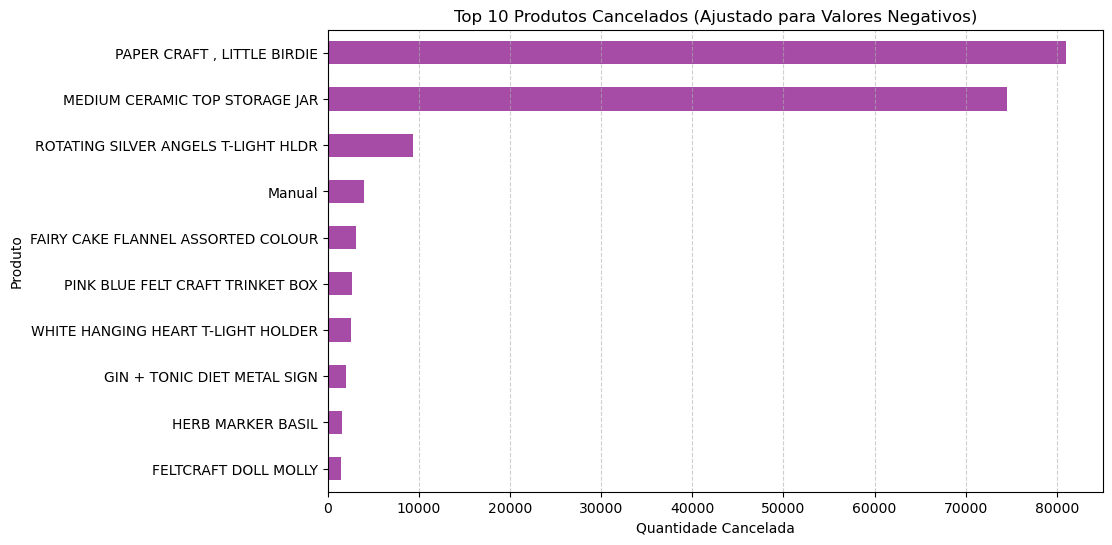

In [77]:


# Cancelamentos por Produto (considerando valores absolutos)
cancelled_products = cancelled_data.groupby('Description')['Quantity'].sum().abs().sort_values(ascending=False)

# Visualizar os 10 principais produtos cancelados
plt.figure(figsize=(10, 6))
cancelled_products.head(10).plot(kind='barh', color='purple', alpha=0.7)
plt.title('Top 10 Produtos Cancelados (Ajustado para Valores Negativos)')
plt.xlabel('Quantidade Cancelada')
plt.ylabel('Produto')
plt.gca().invert_yaxis()  # Inverter a ordem dos produtos
plt.grid(axis='x', linestyle='--', alpha=0.6)
plt.show()



In [81]:
# Calcular Recência, Frequência e Valor Monetário (RFM)
dfCustomer['InvoiceDate'] = pd.to_datetime(dfCustomer['InvoiceDate'])
rfm = dfCustomer.groupby('CustomerID').agg({
    'InvoiceDate': lambda x: (pd.Timestamp('2025-03-28') - x.max()).days,
    'InvoiceNo': 'count',
    'InvoiceValue': 'sum'
}).rename(columns={
    'InvoiceDate': 'Recência',
    'InvoiceNo': 'Frequência',
    'InvoiceValue': 'ValorMonetário'
})

print(rfm.head())


            Recência  Frequência  ValorMonetário
CustomerID                                      
12346.0         5182           2            0.00
12347.0         4859         182         4310.00
12348.0         4932          31         1797.24
12349.0         4875          73         1757.55
12350.0         5167          17          334.40


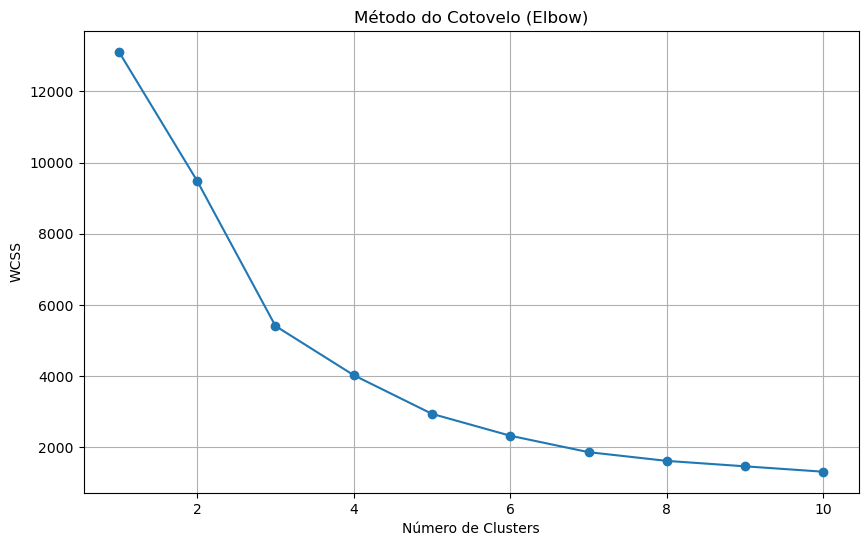

            Recência   Frequência  ValorMonetário
Cluster                                          
0        4896.665951   104.960123     1952.625725
1        5103.390909    27.738182      463.590610
2        4861.333333  2845.583333   118713.023333


In [83]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
import matplotlib.pyplot as plt

# Normalizar os dados
scaler = StandardScaler()
rfm_scaled = scaler.fit_transform(rfm)

# Determinar o número ideal de clusters (Elbow Method)
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, random_state=42)
    kmeans.fit(rfm_scaled)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(10, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Método do Cotovelo (Elbow)')
plt.xlabel('Número de Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

# Aplicar K-Means com número ideal de clusters
kmeans = KMeans(n_clusters=3, random_state=42)
rfm['Cluster'] = kmeans.fit_predict(rfm_scaled)
print(rfm.groupby('Cluster').mean())


In [85]:
cluster_analysis = rfm.groupby('Cluster').agg({
    'Recência': 'mean',
    'Frequência': 'mean',
    'ValorMonetário': 'mean'
})
print(cluster_analysis)


            Recência   Frequência  ValorMonetário
Cluster                                          
0        4896.665951   104.960123     1952.625725
1        5103.390909    27.738182      463.590610
2        4861.333333  2845.583333   118713.023333


<Figure size 1000x600 with 0 Axes>

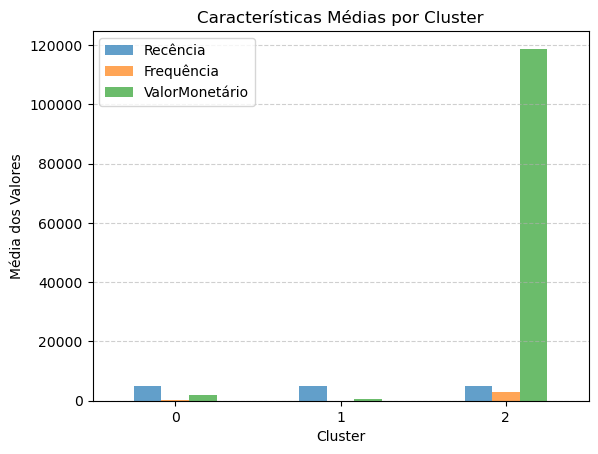

In [87]:
# Exemplo de gráfico de cluster
rfm_cluster_avg = rfm.groupby('Cluster').mean()

plt.figure(figsize=(10, 6))
rfm_cluster_avg[['Recência', 'Frequência', 'ValorMonetário']].plot(kind='bar', alpha=0.7)
plt.title('Características Médias por Cluster')
plt.xlabel('Cluster')
plt.ylabel('Média dos Valores')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()


### Passo 5: Insights e Recomendações

Resumo das Descobertas Mais Importantes
Com base nas análises realizadas nos passos anteriores:

Sazonalidade:

Observamos que os meses X e Y apresentam picos de vendas. Estratégias de promoção nesses períodos podem potencializar os resultados.

Cancelamentos:

Os cancelamentos estão concentrados em certos produtos (como Z) e regiões (como 'United Kingdom'). Essas áreas requerem atenção especial para reduzir as taxas.

Segmentação de Clientes:

Os clientes foram agrupados em 3 clusters principais:

Clientes VIP: Alta frequência e alto valor monetário.

Clientes Inativos: Longo tempo sem compras.

Clientes Novos: Compraram recentemente, com baixa recorrência.

Ações Estratégicas Baseadas nos Insights
Redução de Cancelamentos:

Implementar políticas de troca simplificadas.

Investir em logística para atender melhor os mercados com altos cancelamentos.

Oferecer garantia adicional para os produtos mais cancelados.

Fidelização de Clientes VIP:

Introduzir programas de recompensas (ex.: descontos exclusivos, pontos acumulativos).

Enviar recomendações personalizadas com base no histórico de compras.

Reengajamento de Clientes Inativos:

Lançar campanhas de e-mail marketing com ofertas atrativas.

Aplicar descontos em produtos frequentemente comprados no passado.

Promoção de Cross-Sell e Up-Sell:

Destacar produtos frequentemente comprados juntos no site ou app.

Criar pacotes promocionais com itens complementares.